Preguntar:
 - Si los resultados son aceptables 
 - Como poder mejorar los resultados, por mucho que pruebe a eliminar columnas solo empeoran las métricas,q transformaciones le pueden rentar para que mejore

**Hipótesis: Predecir el precio de una cosa en funcionde varias características**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
df = pd.read_csv('Datasets/kc_house_data.csv')
df.info()
df.head()
df.describe
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Limpieza de datos**

In [10]:
df = df[['price', 'bedrooms', 'bathrooms','condition','view','sqft_living','floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']]
df = df.dropna()

# Calcular el precio promedio por zipcode
df['zip_price'] = df.groupby('zipcode')['price'].transform('mean').round(2)
df.drop(columns=['zipcode'], inplace=True)
df

,price,bedrooms,bathrooms,condition,view,sqft_living,floors,waterfront,yr_built,yr_renovated,zip_price
0,221900.0,3,1.00,3,0,1180,1.0,0,1955,0,310612.76
1,538000.0,3,2.25,3,0,2570,2.0,0,1951,1991,469455.77
2,180000.0,2,1.00,3,0,770,1.0,0,1933,0,462480.04
3,604000.0,4,3.00,5,0,1960,1.0,0,1965,0,551688.67
4,510000.0,3,2.00,3,0,1680,1.0,0,1987,0,685605.78
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3,0,1530,3.0,0,2009,0,584919.21
21609,400000.0,4,2.50,3,0,2310,2.0,0,2014,0,359483.24
21610,402101.0,2,0.75,3,0,1020,2.0,0,2009,0,594547.65
21611,400000.0,3,2.50,3,0,1600,2.0,0,2004,0,616990.59


**Gestion de outliers**
- Historigrama y Box-Plot con Outliers de los datos

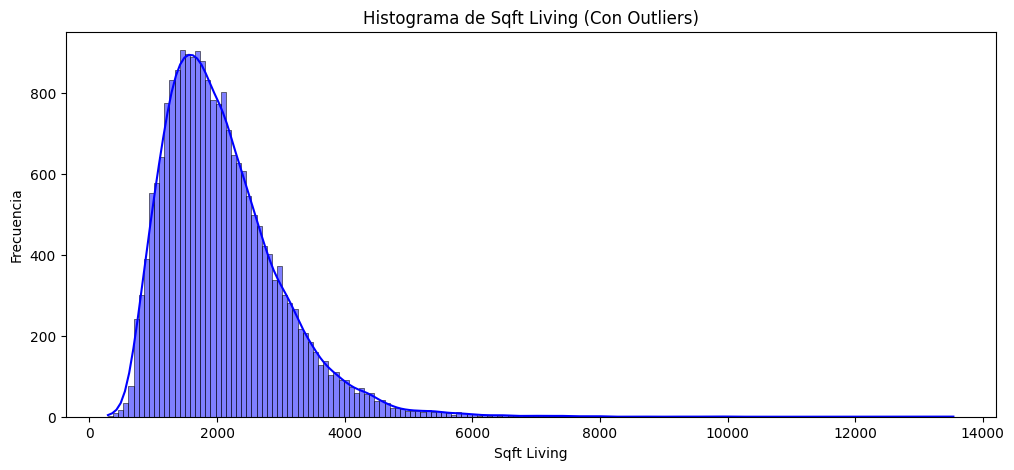

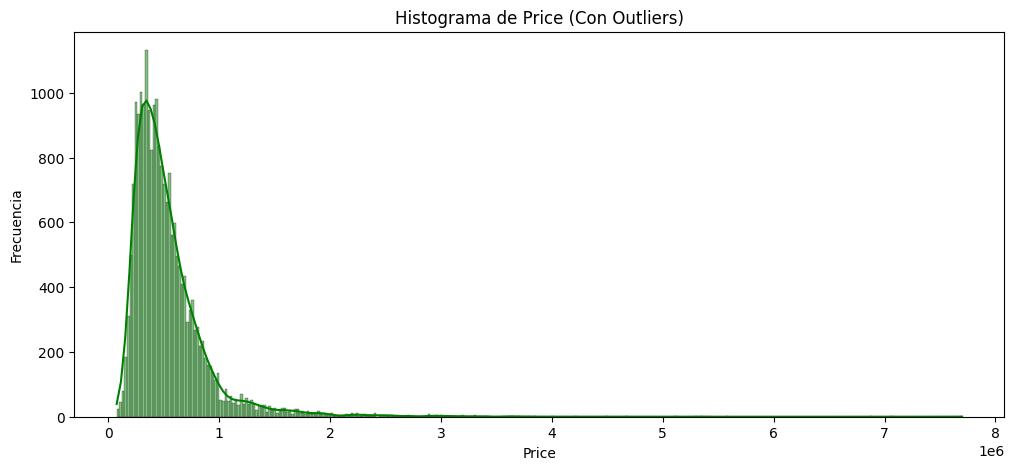

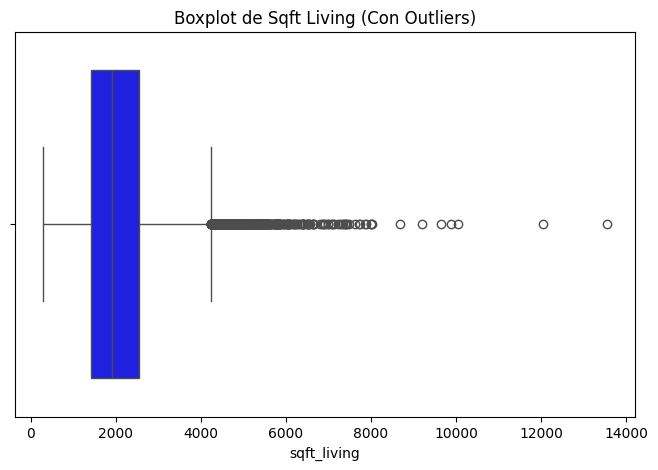

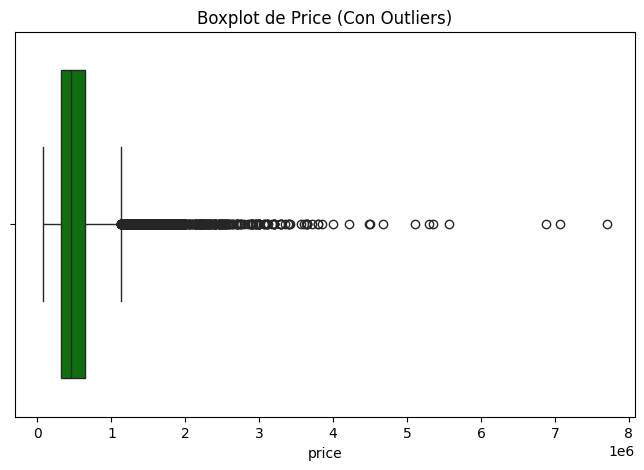

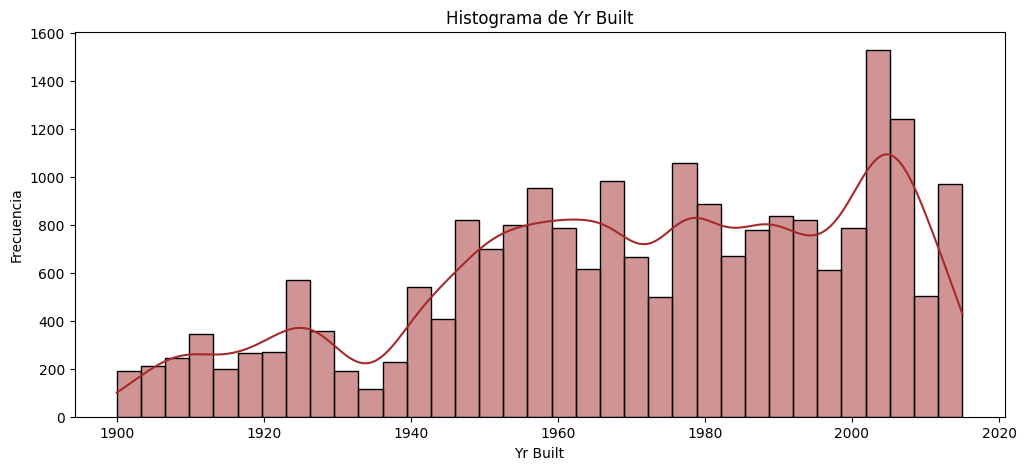

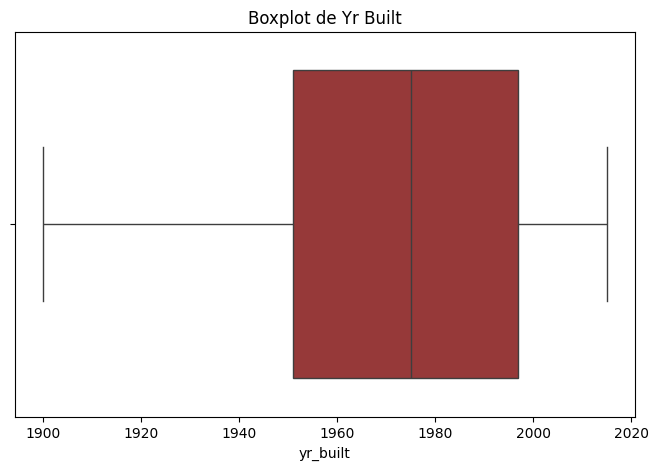

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que las columnas existen en el dataframe
# Crear histogramas para 'sqft_living' y 'price'
plt.figure(figsize=(12, 5))
sns.histplot(df["sqft_living"], kde=True, color="blue")
plt.title("Histograma de Sqft Living (Con Outliers)")
plt.xlabel("Sqft Living")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df["price"], kde=True, color="green")
plt.title("Histograma de Price (Con Outliers)")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

# Crear boxplots para visualizar posibles valores extremos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sqft_living"], color="blue")
plt.title("Boxplot de Sqft Living (Con Outliers)")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"], color="green")
plt.title("Boxplot de Price (Con Outliers)")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df["yr_built"], kde=True, color="brown")
plt.title("Histograma de Yr Built")
plt.xlabel("Yr Built")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["yr_built"], color="brown")
plt.title("Boxplot de Yr Built")
plt.show()


- Eliminacion de ouliers

      price  bedrooms  bathrooms  condition  view  sqft_living  floors  \
0  221900.0         3       1.00          3     0         1180     1.0   
1  538000.0         3       2.25          3     0         2570     2.0   
2  180000.0         2       1.00          3     0          770     1.0   
3  604000.0         4       3.00          5     0         1960     1.0   
4  510000.0         3       2.00          3     0         1680     1.0   

   waterfront  yr_built  zip_price  
0           0      1955  310612.76  
1           0      1951  469455.77  
2           0      1933  462480.04  
3           0      1965  551688.67  
4           0      1987  685605.78  


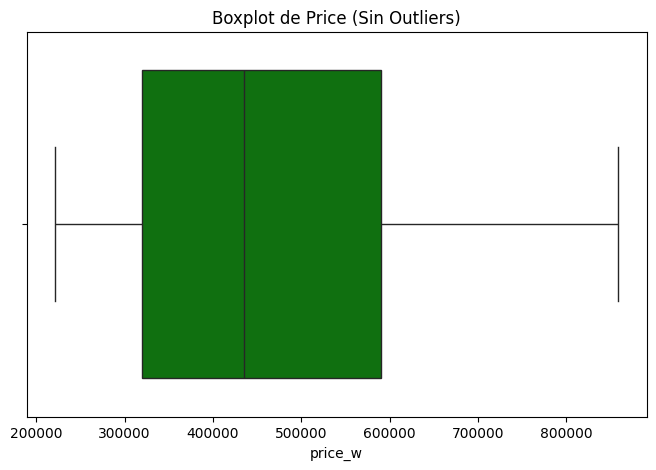

   bedrooms  bathrooms  condition  view  sqft_living  floors  waterfront  \
3         4       3.00          5     0         1960     1.0           0   
4         3       2.00          3     0         1680     1.0           0   
6         3       2.25          3     0         1715     2.0           0   
7         3       1.50          3     0         1060     1.0           0   
8         3       1.00          3     0         1780     1.0           0   

   yr_built  zip_price   price_w  
3      1965  551688.67  604000.0  
4      1987  685605.78  510000.0  
6      1995  294111.28  257500.0  
7      1963  302878.88  291850.0  
8      1960  359483.24  229500.0  


In [12]:
data =df[['price', 'bedrooms', 'bathrooms','condition','view','sqft_living','floors', 'waterfront', 'yr_built', 'zip_price']]
print(data.head())
# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]

"""# Función para eliminar outliers usando Z-score
def eliminar_outliers_zscore(df, col):
    z_scores = np.abs(zscore(df[col]))
    return df[z_scores < 3]"""

# Aplicar eliminación de outliers con IQR y Z-score a las columnas clave
columns_to_clean = ['price', 'sqft_living', 'bedrooms', 'bathrooms','yr_built']
for col in columns_to_clean:
    data = eliminar_outliers_iqr(data, col)
    """data = eliminar_outliers_zscore(data, col)"""

data = data[data['yr_built'] >= 1960]

# Winsorizar la columna 'price' al 5% en ambos extremos
data['price_w'] = winsorize(data['price'], limits=[0.05, 0.05])


plt.figure(figsize=(8, 5))
sns.boxplot(x=data["price_w"], color="green")
plt.title("Boxplot de Price (Sin Outliers)")
plt.show()
data = data.drop(columns = ['price'])
print(data.head())

- Historigrama y Box-Plot sin Outliers de los datos

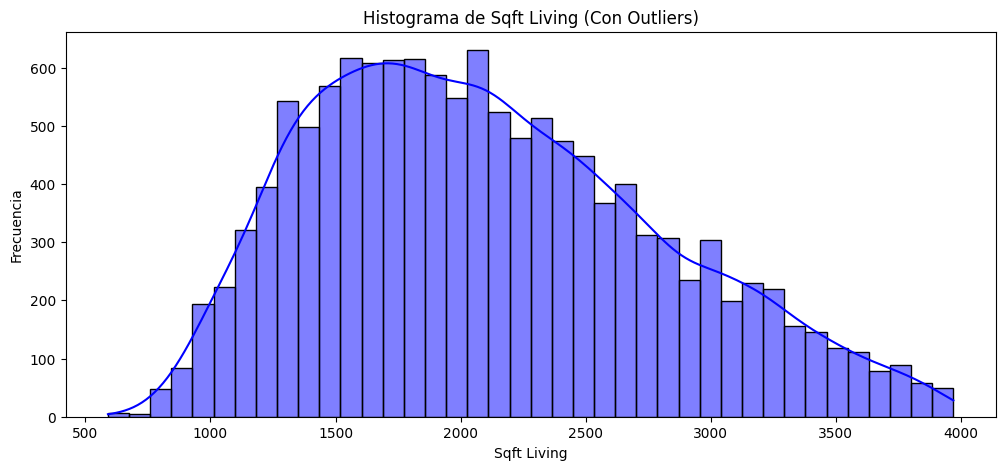

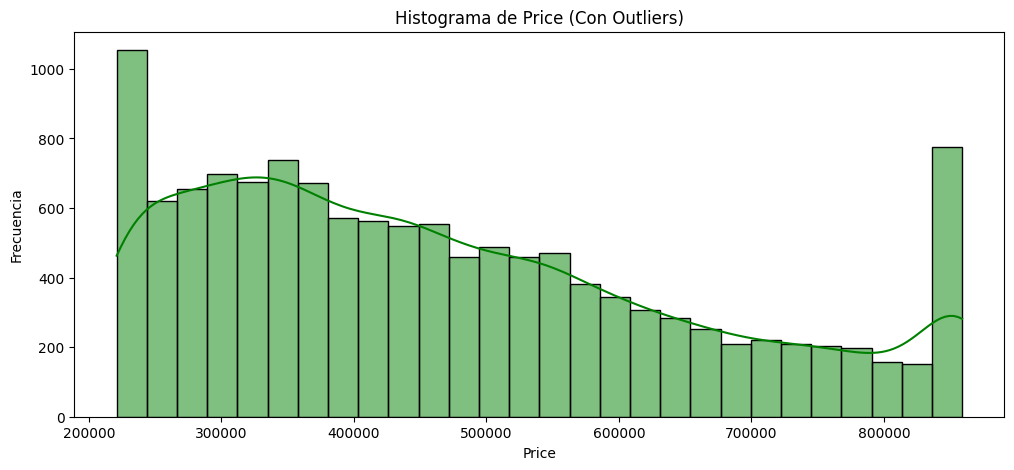

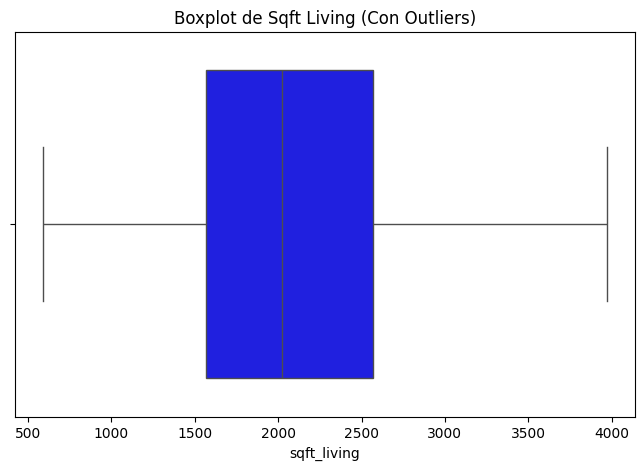

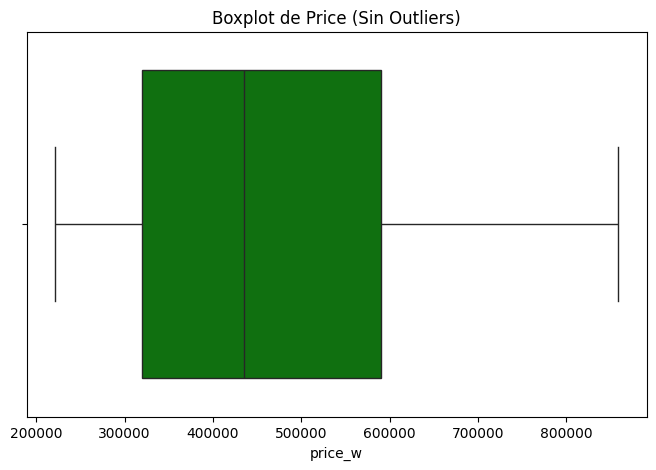

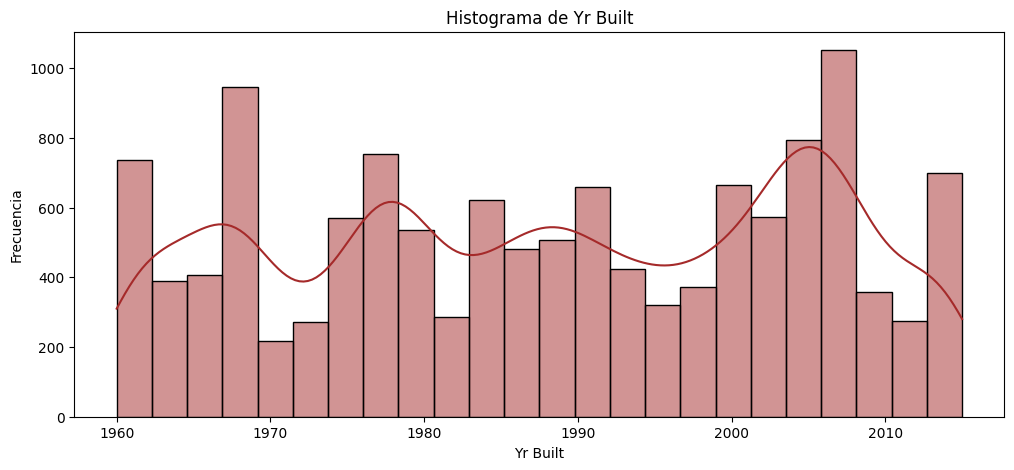

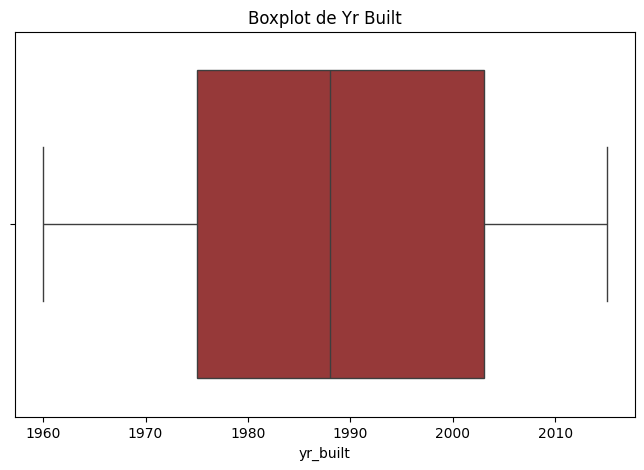

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que las columnas existen en el dataframe
# Crear histogramas para 'sqft_living' y 'price'
plt.figure(figsize=(12, 5))
sns.histplot(data["sqft_living"], kde=True, color="blue")
plt.title("Histograma de Sqft Living (Con Outliers)")
plt.xlabel("Sqft Living")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data["price_w"], kde=True, color="green")
plt.title("Histograma de Price (Con Outliers)")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

# Crear boxplots para visualizar posibles valores extremos
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["sqft_living"], color="blue")
plt.title("Boxplot de Sqft Living (Con Outliers)")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=data["price_w"], color="green")
plt.title("Boxplot de Price (Sin Outliers)")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data["yr_built"], kde=True, color="brown")
plt.title("Histograma de Yr Built")
plt.xlabel("Yr Built")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=data["yr_built"], color="brown")
plt.title("Boxplot de Yr Built")
plt.show()






**Matriz de correlación**

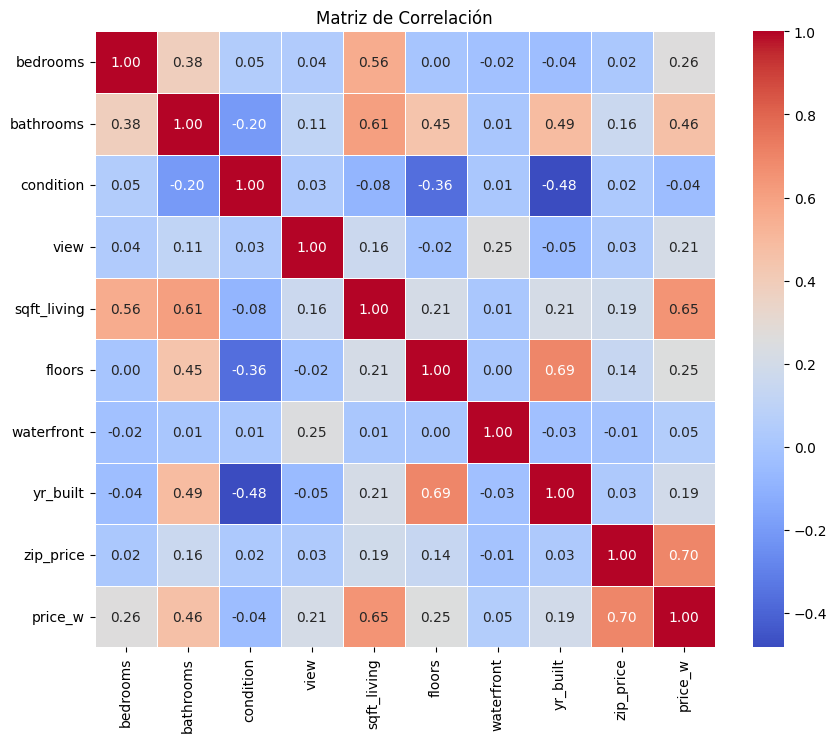

In [14]:
df = data.corr()
# Visualizar matriz de correlación mejorada
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Round 1**

In [15]:
# Seleccionar variables independientes (X) y la variable objetivo (y)
X = data.drop(columns=["price_w"])  # Variables predictoras
y = data["price_w"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de priece: {y.min()}")
print(f"Valor máximo de priece: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["price_w"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["price_w"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de priece: 221000.0
Valor máximo de priece: 859000.0
Correlaciones con la variable objetivo:
price_w        1.000000
waterfront     0.015849
view           0.009442
bathrooms      0.008288
sqft_living    0.004748
floors         0.000007
zip_price     -0.003677
yr_built      -0.003862
bedrooms      -0.009046
condition     -0.014634
Name: price_w, dtype: float64
VIF de cada variable:
      Variable       VIF
0     bedrooms  1.593058
1    bathrooms  2.181143
2    condition  1.313640
3         view  1.117368
4  sqft_living  2.070000
5       floors  2.042320
6   waterfront  1.069318
7     yr_built  2.522291
8    zip_price  1.080788
Intercepto: 470406.6197188609
Coeficientes del modelo:
bedrooms       -10552.413885
bathrooms        7467.954612
condition        4575.605881
view            17762.197465
sqft_living     95983.438447
floors           4669.857929
waterfront       5019.115411
yr_built         8440.088332
zip_price      107933.058433
dtype: float64
MAE (Error Absoluto M

**Round 2**

In [17]:
data2 = data

In [18]:
# Seleccionar variables independientes (X) y la variable objetivo (y)
X = data2.drop(columns=["price_w"])  # Variables predictoras
y = data2["price_w"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de priece: {y.min()}")
print(f"Valor máximo de priece: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["price"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["price"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de priece: 221000.0
Valor máximo de priece: 859000.0
Correlaciones con la variable objetivo:
price          1.000000
waterfront     0.015849
view           0.009442
bathrooms      0.008288
sqft_living    0.004748
floors         0.000007
zip_price     -0.003677
yr_built      -0.003862
bedrooms      -0.009046
condition     -0.014634
Name: price, dtype: float64
VIF de cada variable:
      Variable       VIF
0     bedrooms  1.593058
1    bathrooms  2.181143
2    condition  1.313640
3         view  1.117368
4  sqft_living  2.070000
5       floors  2.042320
6   waterfront  1.069318
7     yr_built  2.522291
8    zip_price  1.080788
Intercepto: 470406.6197188609
Coeficientes del modelo:
bedrooms       -10552.413885
bathrooms        7467.954612
condition        4575.605881
view            17762.197465
sqft_living     95983.438447
floors           4669.857929
waterfront       5019.115411
yr_built         8440.088332
zip_price      107933.058433
dtype: float64
MAE (Error Absoluto Med

**Gráfico 1: Predicciones vs. Valores Reales (Evaluación General del Modelo)**

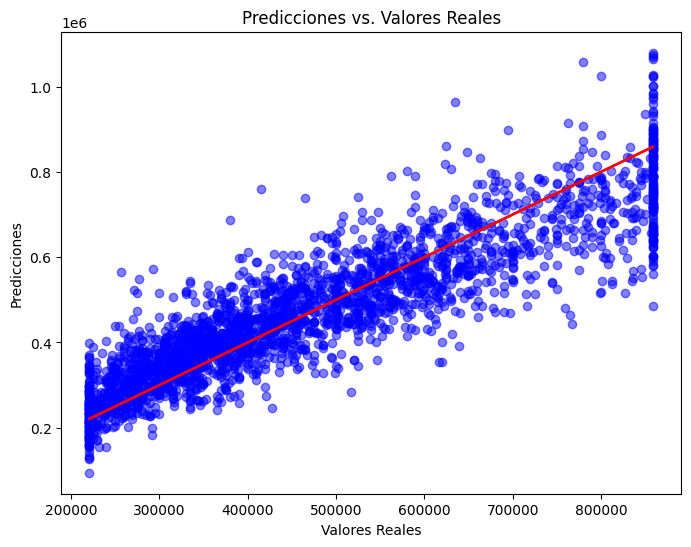

In [19]:
import matplotlib.pyplot as plt

# Predecir los valores del conjunto de prueba
y_pred = modelo.predict(X_test)

# Graficar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


**Gráfico 2: Residuales vs. Predicciones (Evaluación de Errores)**


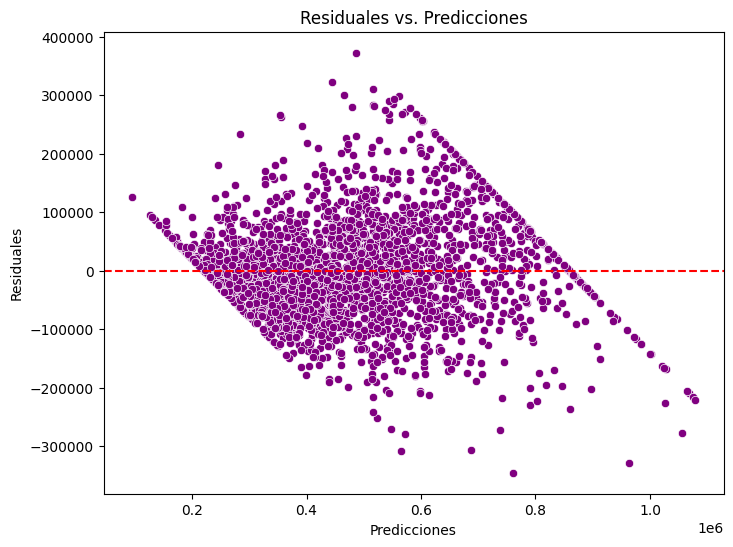

In [20]:
import seaborn as sns

# Calcular los residuales
residuales = y_test - y_pred

# Graficar residuales vs predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuales, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuales vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()
